In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 1. Data Preparation

In [4]:
#Load the dataset
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

# 2. Exploratory Data Analysis (EDA)

In [5]:

print(df.info())  # Check data types and missing values
print(df.describe())  # Statistical summary
print(df.isnull().sum())  # Count missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811

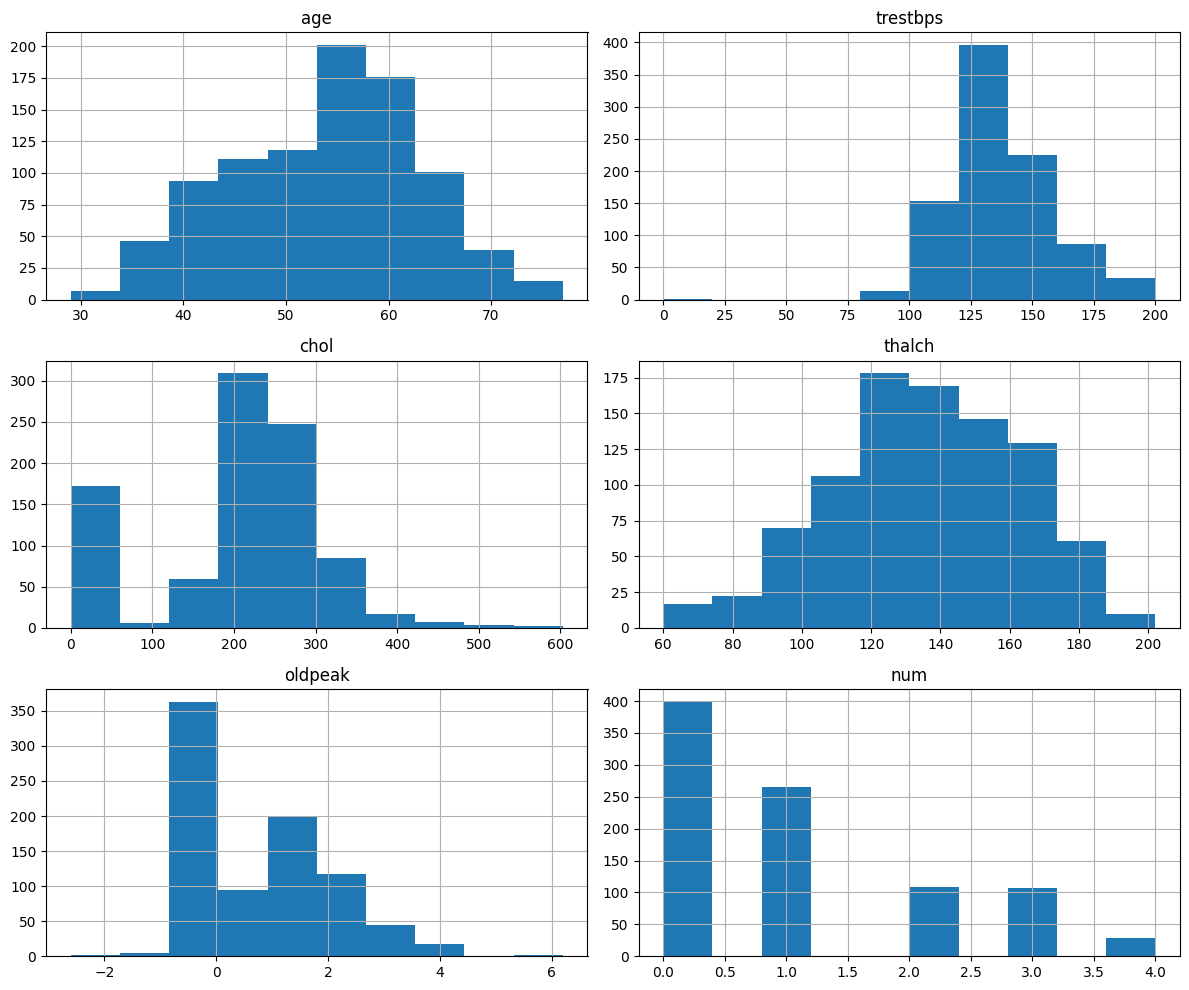

In [6]:
# Visualize distributions
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

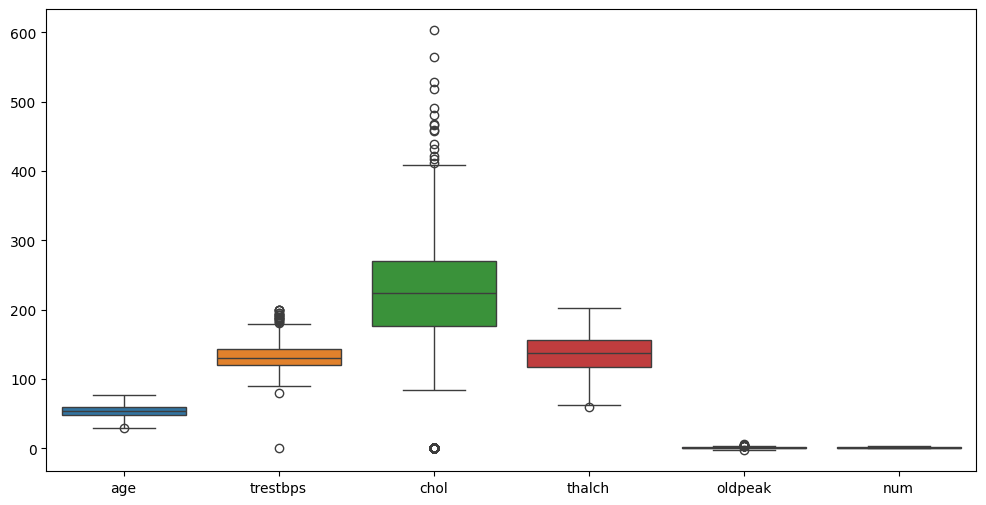

In [7]:
# Box plots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.show()

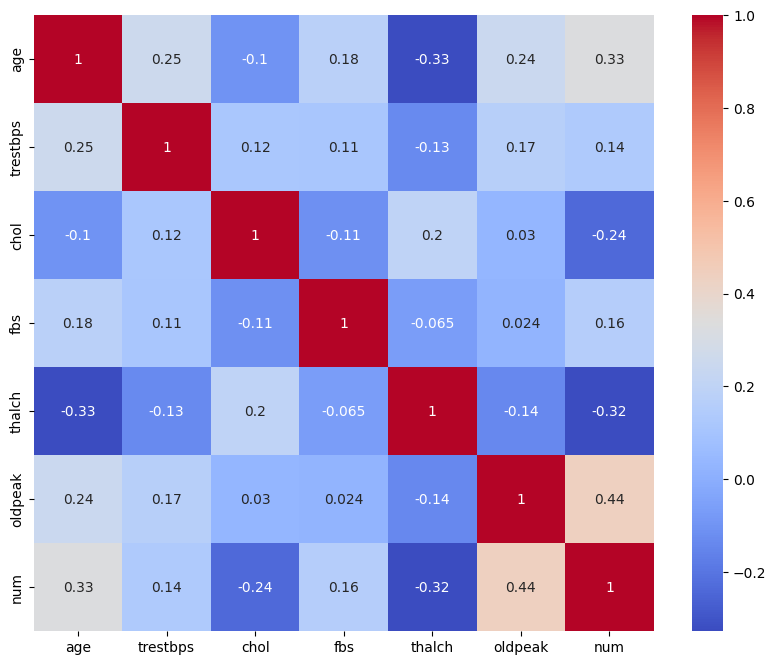

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# 3. Feature Engineering

In [9]:
# Encode categorical variables
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({'True': 1, 'False': 0})
df['exang'] = df['exang'].map({'True': 1, 'False': 0})

In [10]:
# One-hot encode categorical features
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle missing values (fill with median for numerical columns)
df.fillna(df.median(numeric_only=True), inplace=True)

# 4. Decision Tree Classification

In [11]:
# Define features and target
X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)  # Binary classification: 0 = no disease, 1 = disease

In [12]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Predict and evaluate
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))
print(classification_report(y_test, y_pred))

Accuracy: 0.6923076923076923
Precision: 0.75
Recall: 0.6764705882352942
F1 Score: 0.711340206185567
ROC-AUC: 0.6944852941176471
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        80
           1       0.75      0.68      0.71       102

    accuracy                           0.69       182
   macro avg       0.69      0.69      0.69       182
weighted avg       0.70      0.69      0.69       182



# 5. Hyperparameter Tuning

In [15]:
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [16]:
# Evaluate best model
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned F1 Score:", f1_score(y_test, y_pred_best))

Tuned Accuracy: 0.7582417582417582
Tuned F1 Score: 0.7843137254901961


# 6. Model Evaluation and Analysis

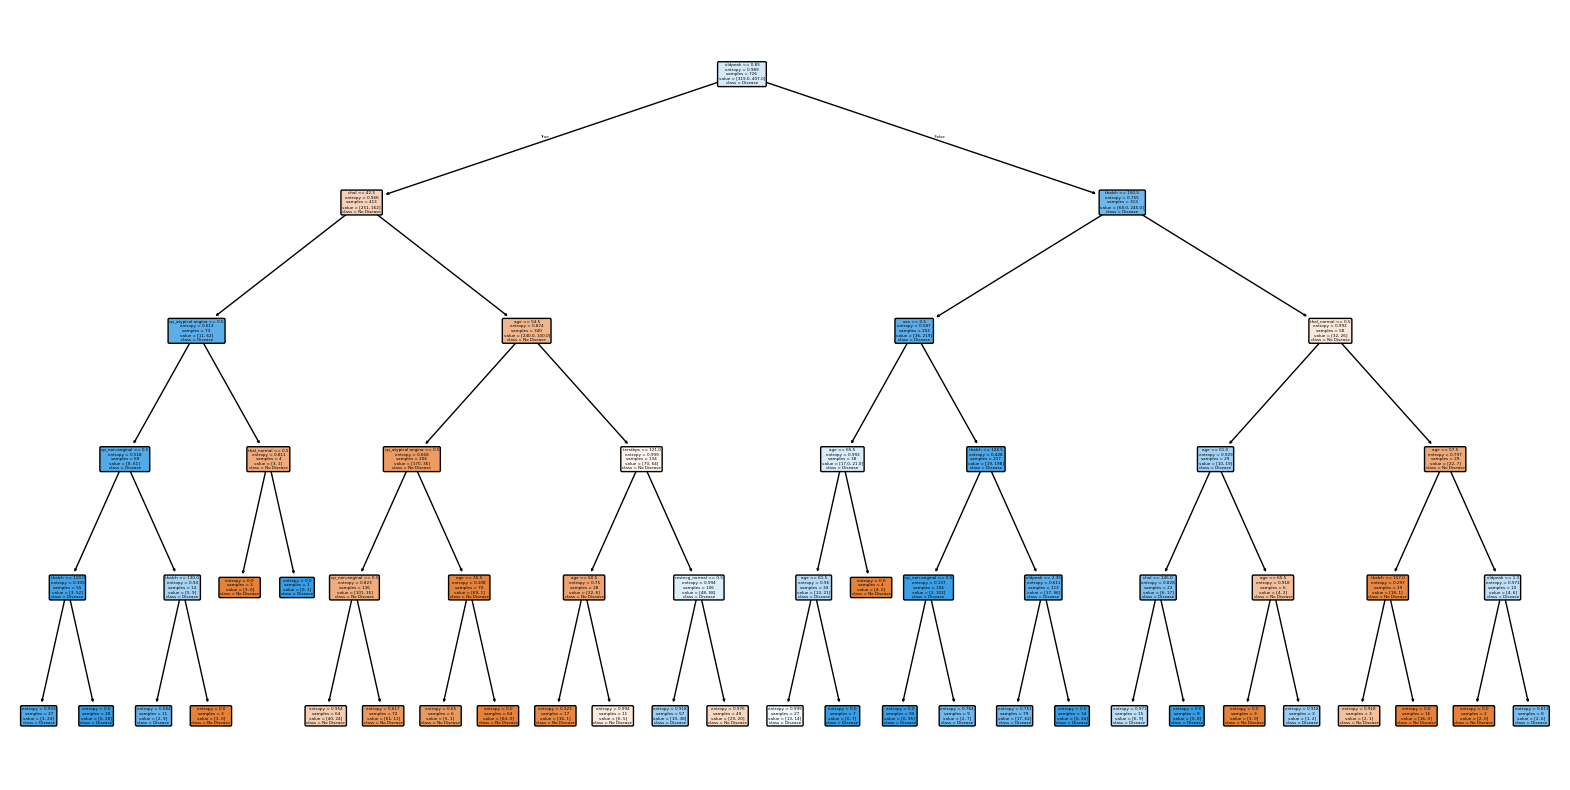

In [17]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.show()


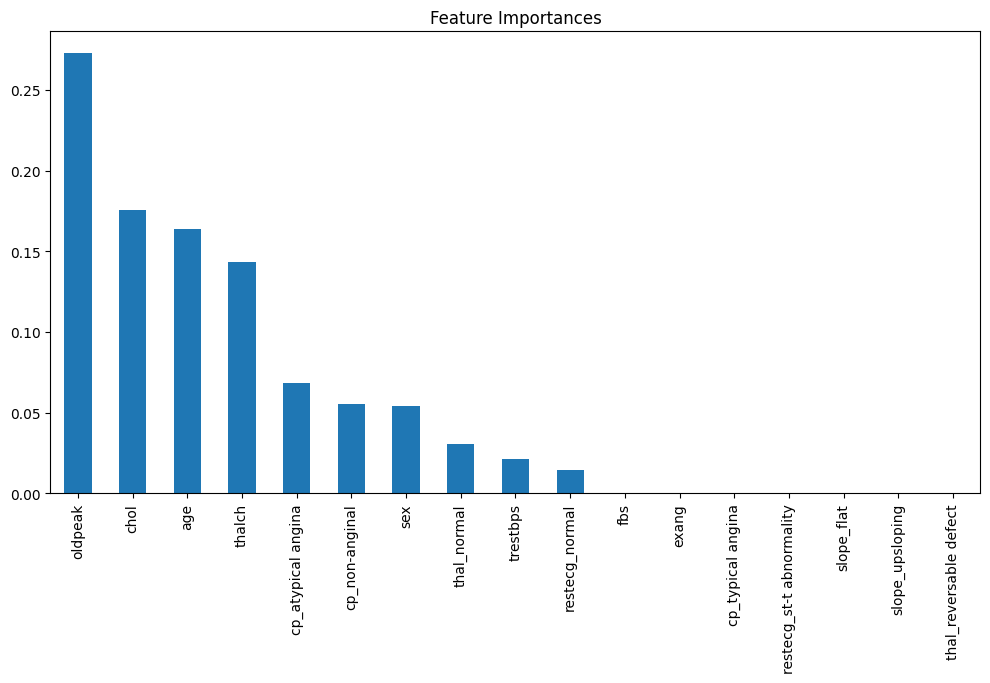

In [18]:
# Feature importance
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Feature Importances')
plt.show()

#Interview Questions
 1. Common hyperparameters of decision tree models:
   - max_depth: Maximum depth of the tree (controls overfitting).
   - min_samples_split: Minimum samples required to split a node.
   - criterion: Function to measure split quality ('gini' or 'entropy').
   - min_samples_leaf: Minimum samples required at a leaf node.
   - max_features: Number of features to consider when looking for the best split.

 2. Difference between Label encoding and One-hot encoding:
   - Label encoding assigns each unique category a number (useful for ordinal data).
   - One-hot encoding creates a new binary column for each category (useful for nominal data).